<a href="https://colab.research.google.com/github/mohamedmohab619/ai-platforms-section/blob/main/AIplatforms%20assignment%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

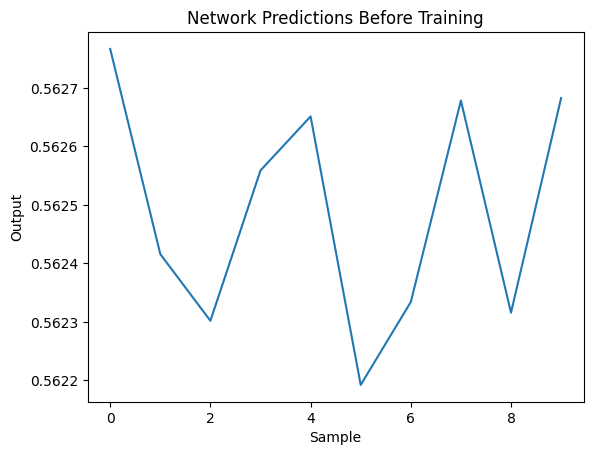

In [5]:
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt


class SimpleNN(nn.Module):
    def __init__(self):  # Corrected from _init_ to __init__
        super(SimpleNN, self).__init__()

        self.fc1 = nn.Linear(3, 5)
        self.fc2 = nn.Linear(5, 4)
        self.fc3 = nn.Linear(4, 2)
        self.fc4 = nn.Linear(2, 1)

        nn.init.uniform_(self.fc1.weight, a=-0.5, b=0.5)
        nn.init.uniform_(self.fc2.weight, a=-0.5, b=0.5)
        nn.init.uniform_(self.fc3.weight, a=-0.5, b=0.5)
        nn.init.uniform_(self.fc4.weight, a=-0.5, b=0.5)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = torch.tanh(self.fc4(x))
        return x


inputs = torch.rand(10, 3)

net = SimpleNN()
with torch.no_grad():
    initial_output = net(inputs)

# Plotting the output
sns.lineplot(data=initial_output.numpy().flatten())
plt.title('Network Predictions Before Training')
plt.xlabel('Sample')
plt.ylabel('Output')
plt.show()


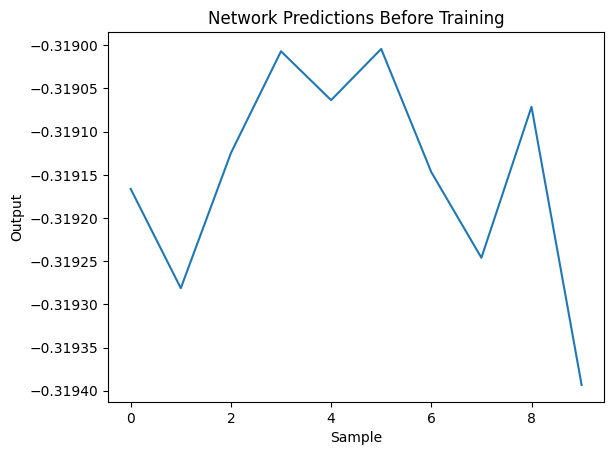

In [6]:
net = SimpleNN()


optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion = nn.MSELoss()


targets = torch.rand(10, 1)


with torch.no_grad():
    before_training = net(inputs)

sns.lineplot(data=before_training.numpy().flatten())
plt.title('Network Predictions Before Training')
plt.xlabel('Sample')
plt.ylabel('Output')
plt.show()

Epoch 0/100, Loss: 0.8658055067062378
Epoch 10/100, Loss: 0.5515540838241577
Epoch 20/100, Loss: 0.34230518341064453
Epoch 30/100, Loss: 0.22280995547771454
Epoch 40/100, Loss: 0.15705826878547668
Epoch 50/100, Loss: 0.12006781250238419
Epoch 60/100, Loss: 0.09840001165866852
Epoch 70/100, Loss: 0.08517362177371979
Epoch 80/100, Loss: 0.07679931074380875
Epoch 90/100, Loss: 0.07133044302463531


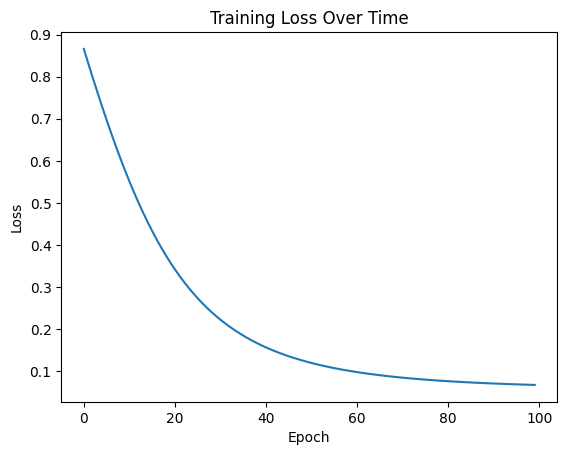

In [7]:
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 10 == 0:
        print(f'Epoch {epoch}/{epochs}, Loss: {loss.item()}')

# Plot the loss over time
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

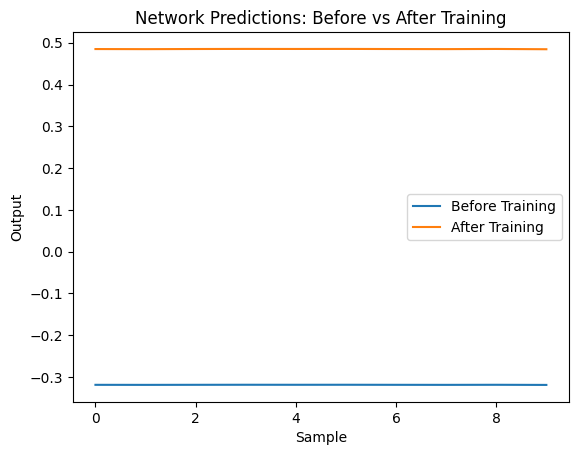

In [8]:
with torch.no_grad():
    after_training = net(inputs)


sns.lineplot(data=before_training.numpy().flatten(), label='Before Training')

sns.lineplot(data=after_training.numpy().flatten(), label='After Training')
plt.title('Network Predictions: Before vs After Training')
plt.xlabel('Sample')
plt.ylabel('Output')
plt.legend()
plt.show()